In [1]:
import pandas as pd
import pdb
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("actual_data.csv")

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

summary_list = []
num_summaries = len(df)
#Preprocess review text
for index in range(num_summaries):
    summary_list.append(preProcessString(df['summary'][index]))

    
#Count vectorizer and tf-idf weighting
vectorizer = TfidfVectorizer(analyzer='word', ngram_range = )
training_features = vectorizer.fit_transform(summary_list)
training_labels = df['topic'].astype(int)

pickle.dump(training_features, open("summary_vectors.pkl", "wb"))

In [11]:
#Test train split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_features, training_labels, test_size=0.33, random_state=39)

In [12]:
#Test classifier accuracy
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.64107744107744102

In [23]:
training_features.shape

(4497, 17000)

In [5]:
def preProcessString(inpString):
    #Remove punctuation
    #pdb.set_trace()
    cleaned_text = re.sub("[.]", " ", inpString)
    return cleaned_text

In [33]:
actual_data['summary'].iloc[1].lower()

'936 10149 13 719 711 712 5036 30 5231 49 347 1105 1106 49 512 15256 3298 609 863 500 1917 318 13 609 888 1120 832 637 10 887 1173 85 22 1182 424 840 503 413 45 1358 888 156.3 936 79 2017 40 114 10 806 269 3882 1850 49 1785 10 2826 156 40 79 440 26 10 2747 13 279 900 13 514.11 768 204 1502 886 26 270 609 281 318 26 513 14002 1689 685 525 15 15257 609 5656 848 15258 712 26 2867 94 15259 774 10 775 26 10 15260 552 776 10 205 242 2392 870 94 126 45 430 79 11035 15261 40 114 3 322 2072 13 609 281 278 15 10 2643 926 271 1948 530 385 2017 22 34 280 4632 94 87 10 77 49 268 1516 202 15 711 1675 2533 22 750 45 440 1411 10 2533 87 179 3298 368 10 5342 5344 6498 11035 15261 1405 530 111 269 498 5690 1466 22 49 3 179 1160 4275 2017 313 94 126 10 558 13 11035 15261 26 3 123 420 887 183 22 276 45 777 514 742 36 49 985 34 641 303 2017.'

In [93]:
set(df['publication_year'].values)

{2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054}

In [89]:
grouped = df.groupby('publication_year')

In [99]:
grouped.count()['record_id']

publication_year
2043    327
2044    312
2045    330
2046    322
2047    407
2048    385
2049    274
2050    289
2051    359
2052    414
2053    541
2054    537
Name: record_id, dtype: int64

In [47]:
grouped.head()

publication_year
2053    541
2054    537
2052    414
2047    407
2048    385
dtype: int64

In [22]:
import itertools
author_list = df['authors'].map(separate_authors)
flat_author_list = list(itertools.chain.from_iterable(author_list))
unique_authors = list(set(flat_author_list))


In [49]:
len(author_list)

4497

In [23]:
d = defaultdict(int)
for x in xs: d[x] += 1

TypeError: cannot perform reduce with flexible type

In [21]:
def separate_authors(inpString):
    return inpString.split(';')

In [107]:
flat_author_list[2]

'9809 5003 9120'

In [108]:
flat_author_list[2] in unique_authors

True

In [13]:
grouped = df.groupby('authors')

In [26]:
import numpy as np
num_authors = len(unique_authors)
author_freq_list = np.zeros(num_authors)

for index in range(num_authors):
    curr_author = unique_authors[index]
    for temp_author in flat_author_list:
        if curr_author == temp_author:
             author_freq_list[index] += 1
    

In [64]:
temp = []
for super_auth in prolific_authors:
    for index in range(len(df)):
        curr_authors = author_list[index]
        for author in curr_authors:
            if super_auth == author:
                temp.append(index)

In [65]:
len(temp)

2127

In [59]:
for super_auth in prolific_authors:
    temp = []
    for index in range(len(df)):
        curr_authors = author_list[index]
        for author in curr_authors:
            if super_auth == author:
                temp.append(index)
    print(super_auth)
    print(sliced_df.iloc[temp])

7782 7783 7784
      topic                                            authors
113       1  7782 7783 7784;10448 10449;7828 22700;10450 10451
1993      1                 7782 7783 7784;8089 8090;1996 1997
2576      1  7828 22700;7782 7783 7784;10448 10449;10450 10451
2647      1     12840 448;7782 7783 7784;10448 10449;5759 5760
3626      1                           7782 7783 7784;1996 1997
4135      1             7782 7783 7784;10448 10449;10450 10451
4425      2                          8303 10686;7782 7783 7784
4463      1    7782 7783 7784;1289 21040;6911 21041;2114 21042
13403 13404
      topic                                            authors
403       0       12780 13402;3347 3348;3114 11167;13403 13404
480       0        3345 3346;12780 13402;3347 3348;13403 13404
1307      1  12780 13402;3347 1211 3348;3114 11167;13403 13404
2286      2       12780 13402;3347 3348;3114 11167;13403 13404
2712      1  12780 13402;3114 11167;13403 13404;3347 1211 3348
2995      1  12780 13402;334

(array([  7.42000000e+03,   4.79000000e+02,   1.27000000e+02,
          3.70000000e+01,   1.20000000e+01,   1.30000000e+01,
          1.00000000e+01,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   3.9,   6.8,   9.7,  12.6,  15.5,  18.4,  21.3,  24.2,
         27.1,  30. ]),
 <a list of 10 Patch objects>)

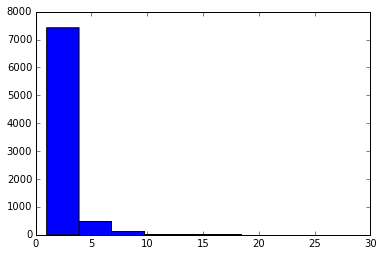

In [38]:
import matplotlib.pyplot as plt
plt.hist(author_freq_list)

In [60]:
prolific_author_indices = []
num_considered_topics = 0
for index in range(num_authors):
    if author_freq_list[index] >= 7:
        prolific_author_indices.append(index)
        num_considered_topics += author_freq_list[index]

In [62]:
num_considered_topics

2127.0

In [43]:
prolific_authors = [unique_authors[i] for i in prolific_author_indices]

In [44]:
prolific_authors

['7782 7783 7784',
 '13403 13404',
 '5228 625',
 '6027 6028',
 '3998 1727',
 '4237 623',
 '4076 482 3308',
 '10443 1927 309',
 '9214 9215',
 '1150 1264',
 '5824 1328',
 '7834 5228',
 '3349 9419 1667',
 '13861 13862',
 '5758 2176',
 '3866 3630',
 '69 871 4077',
 '12549 12550',
 '8899 3631',
 '1996 1997',
 '1323 1324',
 '1998 625',
 '3492 3493',
 '4878 67 5127',
 '2462 1768',
 '819 97 5740',
 '4915 3 6791',
 '1111 67 1975',
 '6731 629',
 '1113 1114 1115',
 '2147 17174',
 '8894 8895',
 '3122 4291',
 '6093 3622 1328',
 '6009 6010',
 '1561 3308 904',
 '8195 8196',
 '8305 12730',
 '3100 8972',
 '2292 3948',
 '5079 1319',
 '3288 1211 754',
 '3470 3517',
 '4915 6791',
 '1668 1161 4058',
 '7785 7786 7787',
 '6196 904',
 '6555 871 7527',
 '7525 7526',
 '12515 12516',
 '904 625',
 '1397 1398',
 '2295 1211 2296',
 '4946 4947',
 '2591 1264',
 '4292 5464 3141',
 '1890 1264',
 '1564 1565',
 '9450 8924',
 '3114 11167',
 '1726 1727',
 '3100 1211 3101',
 '6079 7187 7188',
 '2712 2713',
 '1668 98 3222',


In [48]:
sliced_df = df[['topic','authors']]
# topic_by_prolofic_authors = np.a
# for author in 
sliced_df['authors'].values

array(['13677 13678;13679 13680',
       '9809 5003 9120;1483 1319;2803 6006;6009 6010;707 708',
       '8609 23978;18555 23979;22257 22258', ...,
       '4836 1929;820 4837;3288 754;4838 4839',
       '6294 67 22971;12453 14517', '12123 12124;5541 5542;819 820'], dtype=object)

In [58]:
len(prolific_authors) #[2]

205

In [56]:
sliced_df.iloc[temp]

,topic,authors
10,1,16945 1326;9156 2484;6865 1890;5228 625;4740 1...
82,1,7941 629;3688 3904;14999 623;18016 628;5228 625
214,0,6731 629;3688 3904;7941 629;5228 625
980,2,3688 3904;6731 629;6732 6733;5228 625
1362,2,18271 625;3688 3904;5228 625
2066,1,5824 3308;19825 1562;5228 625
3068,1,21208 2484;3688 3904;19645 2412;5228 625
3788,0,16945 1326;9156 2484;6865 1890;4740 16096;5228...
3874,1,9068 698;3688 3904;5228 625
3999,1,9068 698;1109 1110;1113 1114 1115;3688 3904;52...


In [72]:
## Generate author vectors after removing non prolific author entries
author_vectors = np.zeros((len(df_reduced), len(prolific_authors)))

df_reduced = df[['topic','authors']].iloc[temp]

for index in range(len(df_reduced)):
    temp_auth_list = df_reduced.iloc[index]['authors'].split(';')
    for author in prolific_authors:
        if author in temp_auth_list:
            author_vectors[index][prolific_authors.index(author)] = 1

In [150]:
## Generate author vectors for the entire dataframe
author_vectors_full = np.zeros((len(df), len(prolific_authors)))

for index in range(len(df)):
    temp_auth_list = df.iloc[index]['authors'].split(';')
    for author in prolific_authors:
        if author in temp_auth_list:
            author_vectors_full[index][prolific_authors.index(author)] = 1

print('Author attribute matrix shape: ' + str(author_vectors_full.shape))

##Dump author vectors to a file
pickle.dump(author_vectors_full, open("author_vectors.pkl", "wb"), protocol=2)


Author attribute matrix shape: (4497, 205)


In [158]:
training_features.shape

(4497, 2000)

## Full dataset

In [ ]:
from tqdm import *

In [ ]:
#Test train split - Full data set

from sklearn.cross_validation import train_test_split
import random
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

author_vectors_full = pickle.load(open("author_vectors_full.pkl", "rb"))

training_labels = df['topic'].astype(int)
training_features_final =  np.hstack((author_vectors_full, training_features.toarray()))

X_new = SelectKBest(chi2, k=1900).fit_transform(training_features_final, training_labels)

for i in range(5):
    state = random.randrange(50)
    X_train, X_test, y_train, y_test = train_test_split(X_new, training_labels, test_size=0.33, random_state=state)

    #Test classifier accuracy
    clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print('Accuracy: ' + str(accuracy_score(y_test, predictions)))

## Sliced data set

In [79]:
#Test train split - SLiced data set
from sklearn.cross_validation import train_test_split
import random

training_labels = df_reduced['topic'].astype(int)

for i in range(20):
    state = random.randrange(50)
    X_train, X_test, y_train, y_test = train_test_split(author_vectors, training_labels, test_size=0.33, random_state=state)

    #Test classifier accuracy
    from sklearn.metrics import accuracy_score
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB().fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print('Accuracy: ' + str(accuracy_score(y_test, predictions)))

Accuracy: 0.68660968661
Accuracy: 0.735042735043
Accuracy: 0.700854700855
Accuracy: 0.740740740741
Accuracy: 0.717948717949
Accuracy: 0.689458689459
Accuracy: 0.722222222222
Accuracy: 0.707977207977
Accuracy: 0.730769230769
Accuracy: 0.739316239316
Accuracy: 0.745014245014
Accuracy: 0.702279202279
Accuracy: 0.725071225071
Accuracy: 0.706552706553
Accuracy: 0.698005698006
Accuracy: 0.739316239316
Accuracy: 0.739316239316
Accuracy: 0.717948717949
Accuracy: 0.752136752137
Accuracy: 0.717948717949


In [214]:
#Test train split
from sklearn.cross_validation import train_test_split
import random
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

## Generate list of indices of rows containing prolific authors
filtered_indices = []
for super_auth in prolific_authors:
    for index in range(len(df)):
        curr_authors = author_list[index]
        for author in curr_authors:
            if super_auth == author:
                filtered_indices.append(index)

## Remove entries not writen by prolific authors
df_reduced = df.iloc[filtered_indices]

## Generate author vectors after removing non prolific author entries
author_vectors = np.zeros((len(df_reduced), len(prolific_authors)))
for index in range(len(df_reduced)):
    temp_auth_list = df_reduced.iloc[index]['authors'].split(';')
    for author in prolific_authors:
        if author in temp_auth_list:
            author_vectors[index][prolific_authors.index(author)] = 1

training_labels = df_reduced['topic'].astype(int)

random.seed(50)       
state = random.randrange(50)
X_train, X_test, y_train, y_test = train_test_split(author_vectors, training_labels, test_size=0.33, random_state=state)

#Test classifier accuracy
clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
predictions_author = clf.predict(X_test)
print('Accuracy: ' + str(accuracy_score(y_test, predictions_author)))

Accuracy: 0.68660968661


In [215]:
## Dump feature vectors
import pickle
pickle.dump(temp, open("filtering_indices.pkl", "wb"), protocol=2)
pickle.dump(author_vectors, open("author_vectors.pkl", "wb"), protocol=2)
pickle.dump(training_features, open("summary_vectors.pkl", "wb"), protocol=2)

In [170]:
## Create a submission file
test_data_df = pd.read_csv("BingHackathonTestData.txt", sep='\t',header=None,index_col=None)


In [171]:
test_data_df.shape

(1125, 6)

In [172]:
test_data_df.columns= ['record_id','topic','publication_year','authors','title','summary']

# Generate predictions and submission file

In [191]:
#Count vectorizer and tf-idf weighting
summary_list_test = []
num_summaries = len(test_data_df)
#Preprocess review text
for index in range(num_summaries):
    summary_list_test.append(preProcessString(test_data_df['summary'][index]))
test_features = vectorizer.transform(summary_list_test)
pickle.dump(test_features, open("summary_vectors_test.pkl", "wb"), protocol=2)

#Author attribute vector
author_vectors_test = np.zeros((len(test_data_df), len(prolific_authors)))
df_reduced = test_data_df[['topic','authors']].iloc[temp]
for index in range(len(df_reduced)):
    temp_auth_list = df_reduced.iloc[index]['authors'].split(';')
    for author in prolific_authors:
        if author in temp_auth_list:
            author_vectors_test[index][prolific_authors.index(author)] = 1
pickle.dump(author_vectors_test, open("author_vectors_test.pkl", "wb"), protocol=2)

#Combine feature vectors
testing_features_final =  np.hstack((author_vectors_test, test_features.toarray()))

predictions = clf.predict(testing_features_final)

df_submi = pd.DataFrame(test_data_df['record_id'])
df_submi['topic'] = pd.Series(predictions) 
df_submi.to_csv("classification.tsv", sep='\t', index=False)


In [174]:
temp = []
for super_auth in prolific_authors:
    for index in range(len(test_data_df)):
        curr_authors = author_list[index]
        for author in curr_authors:
            if super_auth == author:
                temp.append(index)


In [187]:
test_features.shape

(4497, 1800)

In [118]:
test_data_df_sliced.shape

(553, 6)

In [192]:
author_vectors_test = np.zeros((len(test_data_df), len(prolific_authors)))

df_reduced = test_data_df[['topic','authors']].iloc[temp]

for index in range(len(df_reduced)):
    temp_auth_list = df_reduced.iloc[index]['authors'].split(';')
    for author in prolific_authors:
        if author in temp_auth_list:
            author_vectors_test[index][prolific_authors.index(author)] = 1
pickle.dump(author_vectors_test, open("author_vectors_test.pkl", "wb"), protocol=2)